<a href="https://colab.research.google.com/github/muhammad-umar-9/Machine_learning_Algorithms/blob/main/classification_using_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Select the features 'Age' and 'Tenure' from the dataframe and convert them to a numpy array
X = df[["Age", "Tenure"]].values

# Select the target variable 'Exited' from the dataframe and convert it to a numpy array
y = df["Exited"].values

# Print the shape of the feature matrix X and the target vector y
print(X.shape, y.shape)

(10000, 2) (10000,)


In [8]:
# Create an instance of the KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNeighborsClassifier model using the feature matrix X and the target vector y
knn.fit(X, y)

KNeighborsClassifier()

In [9]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train, X_test: Feature matrices for training and testing
# y_train, y_test: Target vectors for training and testing
# test_size=0.30: 30% of the data will be used for testing, 70% for training
# random_state=42: Ensures reproducibility of the split
# stratify=y: Ensures the target variable 'y' is evenly distributed in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Create an instance of the KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNeighborsClassifier model using the training data
knn.fit(X_train, y_train)

# Print the accuracy of the model on the testing data
print(knn.score(X_test, y_test))

0.7733333333333333


In [11]:
# Import the numpy library for numerical operations
import numpy as np

# Initialize dictionaries to store training and testing accuracies for different numbers of neighbors
train_acc = {}
test_acc = {}

# Create an array of neighbor values ranging from 1 to 19
neighbors = np.arange(1, 20)

# Loop over each neighbor value
for neighbor in neighbors:
    # Create an instance of the KNeighborsClassifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the KNeighborsClassifier model using the training data
    knn.fit(X_train, y_train)

    # Calculate the accuracy of the model on the training data and store it in the train_acc dictionary
    train_acc[neighbor] = knn.score(X_train, y_train)

    # Calculate the accuracy of the model on the testing data and store it in the test_acc dictionary
    test_acc[neighbor] = knn.score(X_test, y_test)

    # Print the current number of neighbors, training accuracy, and testing accuracy
    print(neighbor, train_acc[neighbor], test_acc[neighbor])

1 0.7542857142857143 0.7283333333333334
2 0.7984285714285714 0.785
3 0.7892857142857143 0.755
4 0.8135714285714286 0.7853333333333333
5 0.8041428571428572 0.7733333333333333
6 0.8147142857142857 0.7933333333333333
7 0.8135714285714286 0.7916666666666666
8 0.8175714285714286 0.7963333333333333
9 0.8178571428571428 0.7966666666666666
10 0.8188571428571428 0.801
11 0.8167142857142857 0.8003333333333333
12 0.8161428571428572 0.7993333333333333
13 0.8161428571428572 0.8
14 0.814 0.801
15 0.814 0.8053333333333333
16 0.815 0.8063333333333333
17 0.8137142857142857 0.8076666666666666
18 0.815 0.8036666666666666
19 0.8148571428571428 0.803


Increasing the number of neighbors in a K-Nearest Neighbors (KNN) classifier means that the algorithm will consider more neighboring data points when making a prediction. Here's what it implies:

With fewer neighbors (e.g., k=1):

The model is more sensitive to noise in the data.
It may lead to overfitting, where the model performs well on training data but poorly on testing data.
With more neighbors (e.g., k=10):

The model becomes more generalized.
It may lead to underfitting, where the model performs poorly on both training and testing data because it is too simplistic.
The goal is to find an optimal number of neighbors that balances the model's performance on both training and testing data, minimizing overfitting and underfitting.

**determine the optimal number of neighbors, you should look for the value of k that provides the highest testing accuracy while maintaining a good balance with training accuracy.**

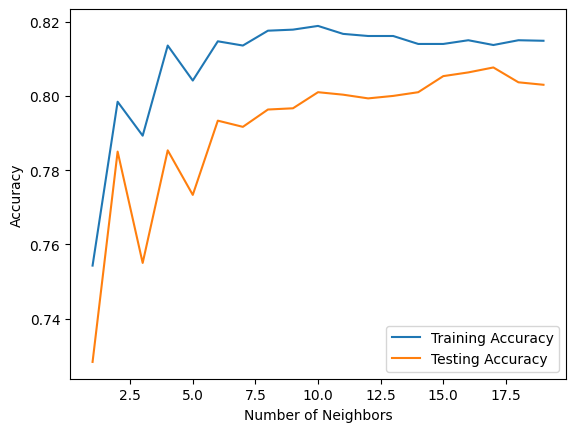

In [15]:
# plot the results
import matplotlib.pyplot as plt
plt.plot(neighbors , train_acc.values() , label = "Training Accuracy")
plt.plot(neighbors , test_acc.values() , label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()